In [2]:
import datetime as dt
launch_data = dt.date(day=10, month=2, year=2022)
launch_data

datetime.date(2022, 2, 10)

### F
dfsdf

In [1]:
while True:
    continue

KeyboardInterrupt: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 11, 0.5)
y = x**2


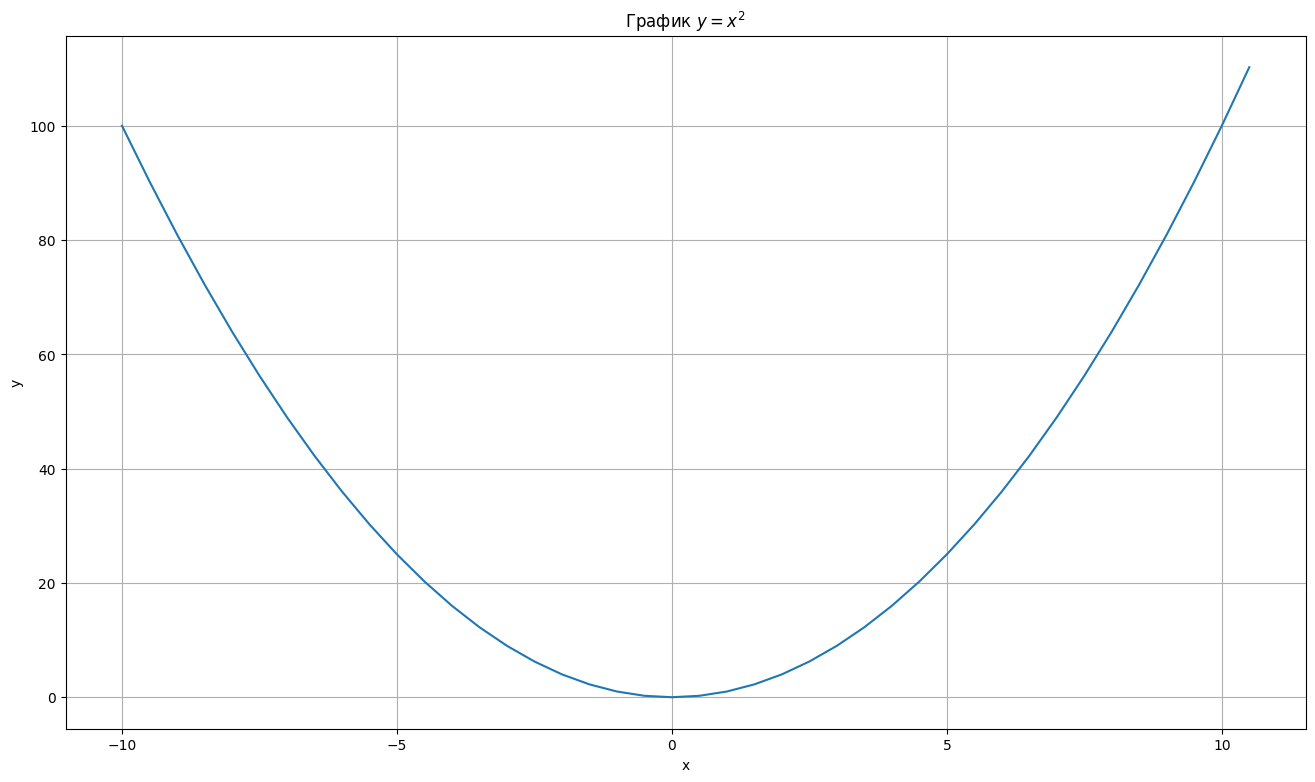

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(x, y)
plt.grid()
plt.title("График $y = x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("1.pdf")

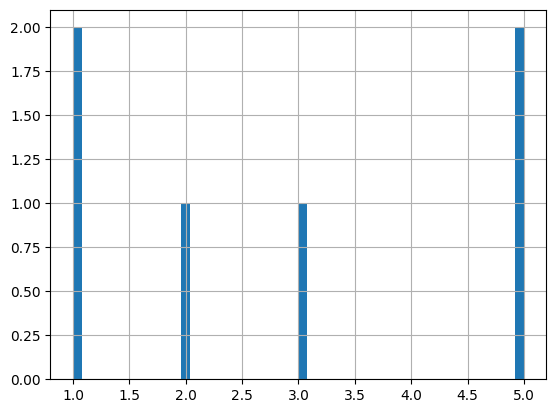

In [21]:
plt.hist([1, 1, 2, 3, 5, 5], bins=50)
plt.grid()
